In [1]:
import tensorflow
from tensorflow.python import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Input, MaxPooling2D
from keras import backend as K
from keras import datasets

from keras import optimizers
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
train_data['Bitcoin_Volume_Log'] = np.log(train_data['Bitcoin_Volume'])
test_data['Bitcoin_Volume_Log'] = np.log(test_data['Bitcoin_Volume'])

In [4]:
X_train = train_data.drop(['Dates', 'Date', 'Bitcoin_Price_Close', 'BTC_Price_Movement_DOD_UD', 'BTC_Price_Movement_ID_UD','Bitcoin_Volume'], axis=1)
y_train = train_data['Bitcoin_Price_Close']

X_test = test_data.drop(['Dates', 'Date', 'Bitcoin_Price_Close', 'BTC_Price_Movement_DOD_UD', 'BTC_Price_Movement_ID_UD','Bitcoin_Volume'], axis=1)
y_test = test_data['Bitcoin_Price_Close']

In [5]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from tensorflow.keras.regularizers import L1L2
def purelin(x):
    return x
# Add bias_regularizer to the output layer
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(50, activation='relu'),
    Dense(50, activation=purelin),
    Dense(1, bias_regularizer=L1L2(l1=0.01, l2=0.01))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.005, patience=5, min_lr=0.00001)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[reduce_lr])

Epoch 1/100
11/11 [==============================] - 1s 16ms/step - loss: 1229629312.0000 - val_loss: 1166391552.0000 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 1229397120.0000 - val_loss: 1166064896.0000 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 1228940416.0000 - val_loss: 1165372928.0000 - lr: 0.0010
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 1227911168.0000 - val_loss: 1163862016.0000 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 1225780480.0000 - val_loss: 1160679424.0000 - lr: 0.0010
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 1221292160.0000 - val_loss: 1154416896.0000 - lr: 0.0010
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 1212771968.0000 - val_loss: 1143219328.0000 - lr: 0.0010
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 1198066304.0000 

In [8]:
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error: {mse}")


4/4 [==============================] - 0s 0s/step - loss: 19598050.0000
Mean Squared Error: 19598050.0


In [9]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 4426.968488706465


In [10]:
price_range = y_train.max() - y_train.min()
price_mean = y_train.mean()

print(f"Price range: {price_range}")
print(f"Price mean: {price_mean}")


Price range: 51779.54394999999
Price mean: 31926.75686795058


In [11]:
predictions = model.predict(X_test_scaled)


4/4 [==============================] - 0s 2ms/step


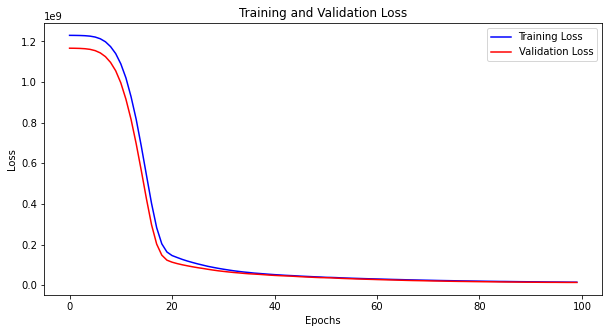

In [12]:
# Get the training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a line plot for the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

 The training and validation loss both decrease and converge to a similar value, it's an indication that the model is performing well.

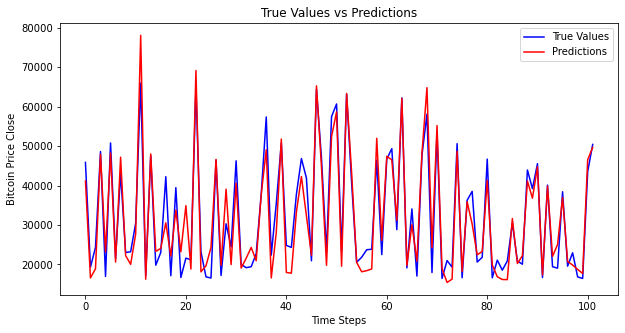

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='True Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Bitcoin Price Close')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

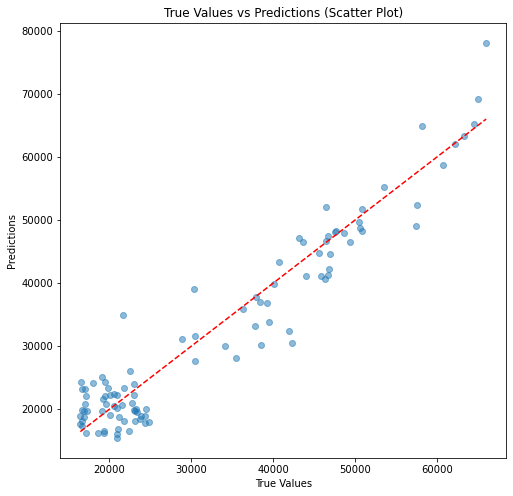

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Scatter Plot)')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate the R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 score:", r2)

Mean Absolute Error (MAE): 3487.6068956035538
Mean Squared Error (MSE): 19598051.249923795
R^2 score: 0.9082029130839645
